# QM Data Analysis

## Data explanation

Data wrangling of cycling trip data from [TfL Unified API](https://cycling.data.tfl.gov.uk/).
Count locations and trip count data for 2022.

### Importing Count Locations

In [19]:
# import libraries

import os
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
# look at locations
# source: Data/ActiveTravelCounts/0-Count locations.csv

loc_df = pd.read_csv("Data/ActiveTravelCounts/0-Count locations.csv")
loc_df.columns

Index(['Site ID', 'Which folder?', 'Shared sites', 'Location description',
       'Borough', 'Functional area for monitoring', 'Road type',
       'Is it on the strategic CIO panel?', 'Easting (UK Grid)',
       'Northing (UK Grid)', 'Latitude', 'Longitude'],
      dtype='object')

In [16]:
loc_gdf = gpd.GeoDataFrame(loc_df, geometry = gpd.points_from_xy(loc_df['Easting (UK Grid)'], loc_df['Northing (UK Grid)'], crs = 'EPSG:27700'))

<Axes: >

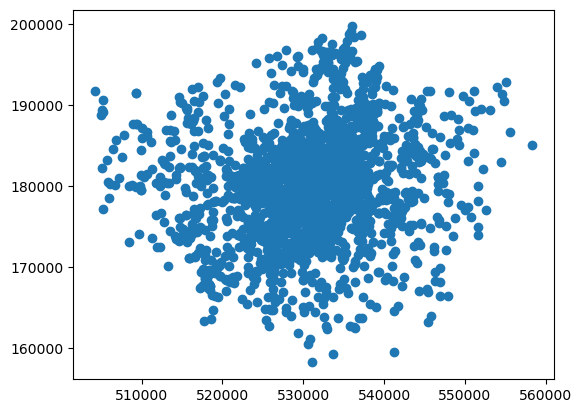

In [22]:
loc_gdf.plot()

In [24]:
loc_gdf.sample(5, random_state = 42)

,Site ID,Which folder?,Shared sites,Location description,Borough,Functional area for monitoring,Road type,Is it on the strategic CIO panel?,Easting (UK Grid),Northing (UK Grid),Latitude,Longitude,geometry
426,G07,Cycleway counts,0,Craven Road jw Gloucester Terrace (B road),Westminster,Inner,0,0,526481.000,181015.000,51.513910,-0.178664,POINT (526481.000 181015.000)
1292,MHPCY036,Cycleway counts,0,Ruckhold Road (south),Waltham Forest,Outer,A Road,0,537677.170,185999.810,51.556082,-0.015470,POINT (537677.170 185999.810)
208,CENCY701,Strategic counts,0,Regent Street,Westminster,Central,A Road,1,529632.840,180463.330,51.508236,-0.133483,POINT (529632.840 180463.330)
1882,OUTCY427,Strategic counts,QWPCY169,Grand Union Canal (Hayes & Harlington),Hillingdon,Outer,MVF,1,509969.137,179490.991,51.503656,-0.416990,POINT (509969.137 179490.991)
282,CGRCY040,Cycleway counts,CENCY139,The Mall,Westminster,Central,Local Street,0,529385.070,179898.720,51.503215,-0.137247,POINT (529385.070 179898.720)


### Importing Count Data

In [25]:
cen_df = pd.read_csv("Data/ActiveTravelCounts/2022-Central.csv")

In [26]:
cen_df.sample(5, random_state = 42)

,Year,UnqID,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count
179988,2022,CENCY090,17/05/2022,Dry,11:00:00,Weekday,A,Southbound,Pavement - Southbound,Cargo bikes,0
203445,2022,CENCY104,17/05/2022,Dry,19:15:00,Weekday,A,Northbound,Carriageway,E-scooters,1
146398,2022,CENCY073,26/05/2022,Dry,13:30:00,Weekday,A,Southbound,Carriageway,Pedestrians,0
144016,2022,CENCY071,12/07/2022,Dry,10:00:00,Weekday,A,Southbound,Pavement - Southbound,E-scooters,0
248285,2022,CENCY130,26/05/2022,Dry,13:15:00,Weekday,A,Westbound,Pavement - Eastbound,Pedestrians,95


In [30]:
cen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370688 entries, 0 to 370687
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Year     370688 non-null  int64 
 1   UnqID    370688 non-null  object
 2   Date     370688 non-null  object
 3   Weather  370688 non-null  object
 4   Time     370688 non-null  object
 5   Day      370688 non-null  object
 6   Round    370688 non-null  object
 7   Dir      370688 non-null  object
 8   Path     370688 non-null  object
 9   Mode     370688 non-null  object
 10  Count    370688 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 31.1+ MB


In [36]:
cen_df['datetime'] = pd.to_datetime(cen_df['Date'] + ' ' + cen_df['Time'])

/tmp/ipykernel_1511/1247564758.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cen_df['datetime'] = pd.to_datetime(cen_df['Date'] + ' ' + cen_df['Time'])


In [37]:
cen_df.sample(5, random_state = 42)

,Year,UnqID,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count,datetime
179988,2022,CENCY090,17/05/2022,Dry,11:00:00,Weekday,A,Southbound,Pavement - Southbound,Cargo bikes,0,2022-05-17 11:00:00
203445,2022,CENCY104,17/05/2022,Dry,19:15:00,Weekday,A,Northbound,Carriageway,E-scooters,1,2022-05-17 19:15:00
146398,2022,CENCY073,26/05/2022,Dry,13:30:00,Weekday,A,Southbound,Carriageway,Pedestrians,0,2022-05-26 13:30:00
144016,2022,CENCY071,12/07/2022,Dry,10:00:00,Weekday,A,Southbound,Pavement - Southbound,E-scooters,0,2022-07-12 10:00:00
248285,2022,CENCY130,26/05/2022,Dry,13:15:00,Weekday,A,Westbound,Pavement - Eastbound,Pedestrians,95,2022-05-26 13:15:00


<Axes: xlabel='Mode', ylabel='Count'>

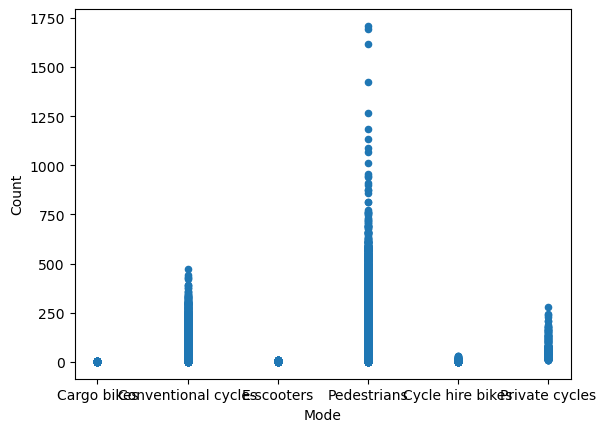

In [47]:
cen_df.plot.scatter('Mode', 'Count')

In [77]:
cen_df.Mode.value_counts()

# Classification of private cycles / cycle hire bikes are older schemes. 
# Replaced by cargo bikes / conventional cycles / E-scooters / Pedestrians
# drop the observations with older schemes
cen_df = cen_df[~((cen_df.Mode == 'Cycle hire bikes') | (cen_df.Mode == 'Private Cycles'))]

<Axes: xlabel='Time'>

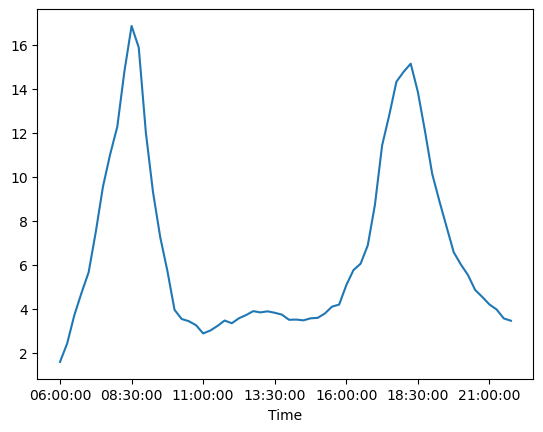

In [83]:
cen_df[cen_df.Mode == 'Conventional cycles'].groupby(['Time']).Count.mean().plot.line()

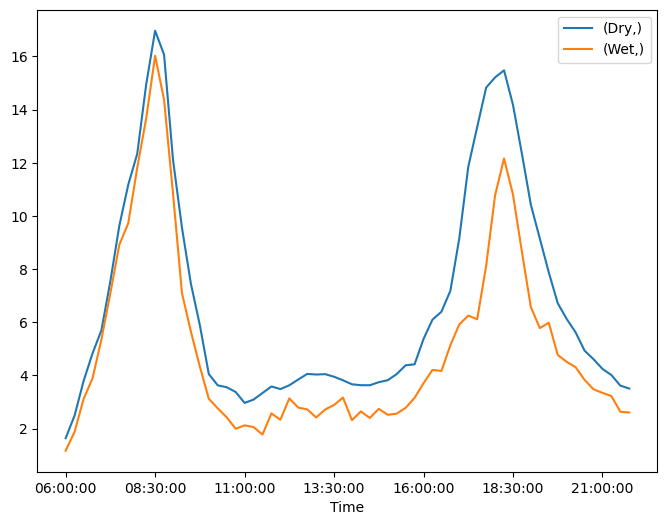

In [87]:
fig, ax = plt.subplots(figsize = (8, 6))
for label, df in cen_df.groupby(['Weather']):
    df[df.Mode == 'Conventional cycles'].groupby(['Time']).Count.mean().plot.line(ax = ax, label = label)
plt.legend()